# Описательная часть проекта

В данном проекте была проведена комплексная работа по анализу данных стартапов, обучению моделей и предсказанию их статуса (работающий или закрытый). Целью проекта было предсказать, какие стартапы будут закрыты, основываясь на различных характеристиках, таких как финансирование, географическое положение и временные интервалы.

## Задачи проекта:

1. **Анализ данных**: Исследовать и визуализировать данные, чтобы понять их структуру, распределение признаков и выявить возможные аномалии или пропуски.
2. **Обработка данных**: Подготовить данные для машинного обучения, включая заполнение пропусков, кодирование категориальных переменных и разделение данных на обучающие и тестовые выборки.
3. **Генерация признаков**: Создать новые признаки на основе временных данных, такие как продолжительность жизни стартапа и временные интервалы между финансированием.
4. **Обучение моделей**: Обучить различные модели классификации (включая Random Forest, Logistic Regression и Decision Tree) для предсказания статуса стартапов и оценить их качество с помощью метрик, таких как ROC AUC и матрица ошибок.
5. **Экономический анализ**: Оценить риски и потенциальные прибыли от инвестиций в стартапы, основываясь на предсказаниях моделей и характеристиках стартапов.

## Данные

Данные для анализа были представлены в виде трех наборов, включающих информацию о стартапах. Каждый набор данных содержал следующие столбцы:

- **name**: уникальное название стартапа (категориальный признак).
- **category_list**: категории, к которым принадлежит стартап (категориальный признак).
- **funding_total_usd**: общее финансирование в долларах США (числовой признак).
- **status**: целевой признак, представляющий статус стартапа (работающий или закрытый).
- **country_code, state_code, region, city**: географические признаки, описывающие местоположение стартапа (категориальные признаки).
- **funding_rounds**: количество раундов финансирования (числовой признак).
- **founded_at, first_funding_at, last_funding_at, closed_at**: временные признаки, представляющие даты различных событий (датовые признаки).

## Методология

Проект следовал стандартному процессу анализа данных, включая этапы предварительного анализа, обработки, генерации признаков, обучения моделей и оценки результатов. Визуализация данных использовалась для лучшего понимания распределений и взаимосвязей между признаками. Модели классификации были выбраны для предсказания статуса стартапов, так как они хорошо подходят для задач бинарной классификации и позволяют интерпретировать результаты.

## Ожидаемые результаты

Ожидалось, что проект предоставит четкие рекомендации по оценке жизнеспособности стартапов, основываясь на предсказаниях их статуса и характеристиках. Результаты анализа помогут в принятии обоснованных решений о распределении инвестиций и стратегии поддержки стартапов, а также в выявлении потенциальных рисков и возможностей для инвесторов.


In [1]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML

from scipy import stats
from scipy.stats import spearmanr

from phik import phik_matrix
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score,classification_report,
                             mean_absolute_error, mean_squared_error,
                             precision_score, recall_score, roc_auc_score, r2_score)
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV,cross_val_score,
                                     train_test_split,train_test_split, StratifiedKFold)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (LabelEncoder, MinMaxScaler,
                                   OneHotEncoder, OrdinalEncoder,
                                   StandardScaler)
import xgboost as xgb  # XGBoost модель
import lightgbm as lgb  # LightGBM модель
import catboost as cb  # CatBoost модель
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import phik
from phik.report import plot_correlation_matrix
import category_encoders as ce
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay

import pickle
# Настроим широкоформатный Jupyter, максимальный вывод колонок
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df_sample_submit = pd.read_csv(r"C:\Users\nikita.rusanov\Documents\учеба\Мастерская\startups-operations-close-predictions-m-1-46-ds\kaggle_startups_sample_submit_28062024.csv")
df_test = pd.read_csv(r"C:\Users\nikita.rusanov\Documents\учеба\Мастерская\startups-operations-close-predictions-m-1-46-ds\kaggle_startups_test_28062024.csv")
df_train = pd.read_csv(r"C:\Users\nikita.rusanov\Documents\учеба\Мастерская\startups-operations-close-predictions-m-1-46-ds\kaggle_startups_train_28062024.csv")

In [3]:
def know(df):
    display(df.head())
    print('_'*100)
    print('Общая информация')
    df.info()
    print('_'*100)
    print('Характеристики распределения')
    display(df.describe().T)
    try:
        display(df.describe(include = ['object']).T)
    except:
        print('Нет столбцов типа object')
    print('_'*100)
    print('Кол-во дубликатов записей:', df.duplicated().sum())
    count = 0
    print('_'*100)
    print('Признаки типа object:')
    for column in df.select_dtypes(include=['object']).columns:
        print('\n', column, ': ', df[column].nunique(), 'категории - ', df[column].unique())
    print('_'*100)
    print('Пропуски в колонках:\n')
    for column in df.columns:
        if df[column].isna().sum() > 0:
            print(column, ' - ', df[column].isna().sum(), 'пропусков, ', round(df[column].isna().sum() * 100 / df.shape[0],2), '% от числа строк.' )
            count = +1
    if count == 0:
        print('Пропусков нет')

In [4]:
know(df_sample_submit)

,name,status
0,Crystalsol,closed
1,JBI Fish & Wings,operating
2,COINPLUS,closed
3,Imagine Communications,closed
4,DNA13,operating


____________________________________________________________________________________________________
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    13125 non-null  object
 1   status  13125 non-null  object
dtypes: object(2)
memory usage: 205.2+ KB
____________________________________________________________________________________________________
Характеристики распределения


,count,unique,top,freq
name,13125,13125,Crystalsol,1
status,13125,2,operating,6635


,count,unique,top,freq
name,13125,13125,Crystalsol,1
status,13125,2,operating,6635


____________________________________________________________________________________________________
Кол-во дубликатов записей: 0
____________________________________________________________________________________________________
Признаки типа object:

 name :  13125 категории -  ['Crystalsol' 'JBI Fish & Wings' 'COINPLUS' ... 'Inkd.com' 'AdWill'
 'RingCentral']

 status :  2 категории -  ['closed' 'operating']
____________________________________________________________________________________________________
Пропуски в колонках:

Пропусков нет


In [5]:
know(df_test)

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


____________________________________________________________________________________________________
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB
_______________________________________________________________________________________

,count,mean,std,min,25%,50%,75%,max
funding_total_usd,10547.0,1.654910e+07,9.217283e+07,1.0,320000.0,2000000.0,10000000.0,4.715000e+09
funding_rounds,13125.0,1.714438e+00,1.318800e+00,1.0,1.0,1.0,2.0,1.500000e+01
lifetime,13125.0,3.097610e+03,2.128357e+03,52.0,1726.0,2526.0,3866.0,1.716700e+04


,count,unique,top,freq
name,13125,13125,Crystalsol,1
category_list,12534,6206,Software,775
country_code,11743,96,USA,7428
state_code,11430,235,CA,2552
region,11536,688,SF Bay Area,1750
city,11538,2117,San Francisco,656
first_funding_at,13125,3299,2014-01-01,126
last_funding_at,13125,3021,2014-01-01,111


____________________________________________________________________________________________________
Кол-во дубликатов записей: 0
____________________________________________________________________________________________________
Признаки типа object:

 name :  13125 категории -  ['Crystalsol' 'JBI Fish & Wings' 'COINPLUS' ... 'Inkd.com' 'AdWill'
 'RingCentral']

 category_list :  6206 категории -  ['Clean Technology' 'Hospitality' 'Finance' ...
 'Design|E-Commerce|Marketplaces|Printing'
 'Advertising Exchanges|Mobile|Mobile Advertising'
 'Communications Hardware|Messaging|Mobile|Office Space|Technology|VoIP']

 country_code :  96 категории -  ['NIC' 'USA' 'LUX' 'CAN' nan 'MYS' 'DEU' 'GBR' 'FRA' 'ITA' 'CHN' 'ARG'
 'NLD' 'IRL' 'AUS' 'CHE' 'CHL' 'ESP' 'IND' 'ISR' 'DNK' 'KOR' 'RUS' 'PHL'
 'URY' 'SGP' 'BRA' 'EGY' 'MEX' 'POL' 'VNM' 'AUT' 'EST' 'BEL' 'DMA' 'PRT'
 'SWE' 'JOR' 'HUN' 'HKG' 'JPN' 'ZAF' 'COL' 'BGR' 'CZE' 'GRC' 'LTU' 'TWN'
 'ISL' 'IDN' 'FIN' 'NOR' 'ARE' 'UKR' 'KEN' 'NGA' 'TUR' 'C

In [6]:
know(df_train)

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN


____________________________________________________________________________________________________
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage

,count,mean,std,min,25%,50%,75%,max
funding_total_usd,42447.0,1.824748e+07,1.871173e+08,1.0,336027.5,2000000.0,10000000.0,3.007950e+10
funding_rounds,52516.0,1.740670e+00,1.374522e+00,1.0,1.0,1.0,2.0,1.900000e+01


,count,unique,top,freq
name,52515,52515,Lunchgate,1
category_list,50051,22105,Software,3207
status,52516,2,operating,47599
country_code,47014,134,USA,29702
state_code,45753,300,CA,10219
region,46157,1036,SF Bay Area,6970
city,46157,4477,San Francisco,2824
founded_at,52516,5402,2012-01-01,2171
first_funding_at,52516,4603,2013-01-01,450
last_funding_at,52516,4305,2014-01-01,369


____________________________________________________________________________________________________
Кол-во дубликатов записей: 0
____________________________________________________________________________________________________
Признаки типа object:

 name :  52515 категории -  ['Lunchgate' 'EarLens' 'Reviva Pharmaceuticals' ... 'Taskforce'
 'NetScaler' 'Apparcando']

 category_list :  22105 категории -  ['Online Reservations|Restaurants' 'Manufacturing|Medical|Medical Devices'
 'Biotechnology' ... 'Gambling|Games|Online Gaming|Sports'
 'Aerospace|Mobile|Transportation|Travel'
 'Online Rental|Parking|Price Comparison']

 status :  2 категории -  ['operating' 'closed']

 country_code :  134 категории -  ['CHE' 'USA' nan 'GBR' 'RUS' 'ESP' 'FRA' 'SWE' 'IND' 'KOR' 'AUS' 'TWN'
 'CHN' 'HUN' 'CAN' 'FIN' 'BRA' 'EGY' 'PRT' 'ISR' 'CHL' 'SVK' 'NLD' 'ARG'
 'ARE' 'JPN' 'IRL' 'DEU' 'LBN' 'EST' 'IDN' 'BEL' 'MEX' 'DNK' 'ITA' 'GRC'
 'ROM' 'TUR' 'SGP' 'SAU' 'MYS' 'NGA' 'QAT' 'VNM' 'BGR' 'GHA' 'UGA' '

## 📊 Анализ предоставленных данных

### ✅ df_sample_submit
- Содержит только два столбца: `name` и `status`.
- Используется как **шаблон для отправки предсказаний**.
- **Пропусков и дубликатов нет** — данные чистые.

---

### 🧪 df_test
- **Размер**: 13,125 строк, 11 колонок.
- **Типы признаков**: в основном категориальные, особенно:
  - `category_list`
  - `region`
  - `city`
- **Пропуски обнаружены** в следующих колонках:
  - `category_list`
  - `funding_total_usd`
  - `country_code`
  - `state_code`
  - `region`
  - `city`

---

### 🧠 df_train
- **Размер**: 52,516 строк, 13 колонок.
- Содержит все признаки из `df_test`, а также:
  - `status` — **целевая переменная**
  - `closed_at` — дата закрытия компании
- **Пропуски также присутствуют**:
  - `funding_total_usd`
  - `country_code`
  - `state_code`
  - `region`
  - `city`

---

### 📝 Выводы
- Для построения модели обучения используется `df_train`, где `status` — целевая переменная.
- Перед обучением необходимо провести **обработку пропусков** в данных.
- `df_sample_submit` — шаблон, в который нужно подставить предсказания модели по данным из `df_test`.


## Рассмотрим признаки

Признак **"category_list"**

In [7]:
print('Количество уникальных значений: ', df_train['category_list'].nunique())
print('Количество пустых значений: ', df_train[df_train['category_list'].isna()].shape[0])

Количество уникальных значений:  22105
Количество пустых значений:  2465


In [8]:
# Заменим пустые значения на unknown
df_train['category_list'] = (df_train['category_list'].fillna('unknown'))
df_test['category_list'] = (df_test['category_list'].fillna('unknown'))

In [9]:
print('Количество уникальных значений: ', df_train['category_list'].nunique())
print('Количество пустых значений: ', df_train[df_train['category_list'].isna()].shape[0])

Количество уникальных значений:  22106
Количество пустых значений:  0


In [10]:
from collections import Counter

In [11]:
# Разделим категории по " | " и создадим список всех категорий
all_categories = df_train['category_list'].str.split('|').explode()

# Подсчитаем частоту каждой категории
category_counts = all_categories.value_counts()
print(category_counts)

category_list
Software                  7017
Mobile                    4399
Biotechnology             3668
E-Commerce                3308
unknown                   2465
                          ... 
First Aid                    1
Quantitative Marketing       1
Startup Histrionics          1
EDA Tools                    1
Elderly                      1
Name: count, Length: 855, dtype: int64


In [12]:
# Фильтруем категории, которые встречаются ровно 1 раз
categories_with_one_count = category_counts[category_counts == 1]

# Подсчитываем количество таких категорий
num_categories_with_one_count = categories_with_one_count.shape[0]

print(num_categories_with_one_count)


24


Признак   **'country_code', 'state_code', 'region','city'**

In [13]:
categorical_columns = ['country_code', 'state_code', 'region','city']

In [14]:
#Обработаю пропуски для более точного анализа.


df_train[categorical_columns] = df_train[categorical_columns].fillna('unknown')
df_test[categorical_columns] = df_test[categorical_columns].fillna('unknown')

In [15]:
print('Количество уникальных значений для каждого признака:')
for column in categorical_columns:
    print(column,': ',df_train[column].unique().shape[0])

Количество уникальных значений для каждого признака:
country_code :  135
state_code :  301
region :  1037
city :  4478


In [16]:
print('Количество значений, которые встречаються только 1 раз')
for column in categorical_columns[:]:
    print(column,': ',(df_train[column].value_counts() == 1).sum())


Количество значений, которые встречаються только 1 раз
country_code :  22
state_code :  44
region :  220
city :  2304


In [17]:
print('Количество значений, которые встречаються 5 раз или реже')
for column in categorical_columns[:]:
    print(column,': ',(df_train[column].value_counts() <= 5).sum())

Количество значений, которые встречаються 5 раз или реже
country_code :  54
state_code :  109
region :  585
city :  3635


Признаки с датами

In [18]:
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at']

In [19]:
datasets = [df_train,df_test]
dataset_names = ['Обучающая выборка', 'Тестовая выборка']
date_filters = ['< "1980-01-01"', '> "2018-01-01"']

In [20]:
#Значения меньше 1980 г.

datasets[0].query(f'{date_columns[0]} {date_filters[0]}')

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
75,Grupo A,E-Books|E-Commerce|Publishing,6772388.0,operating,BRA,23,Porto Alegre,Porto Alegre,1,1973-01-01,2009-09-30,2009-09-30,NaN
611,Mountain View Locksmith,Local Businesses,NaN,operating,USA,CA,SF Bay Area,Mountain View,1,1974-02-08,1984-07-23,1984-07-23,NaN
838,Suburban Ostomy Supply Company,Health and Wellness|Health Care|Medical|Medica...,NaN,operating,USA,MA,Boston,Holliston,1,1975-01-01,1995-06-30,1995-06-30,NaN
1117,FSI International,Semiconductors,NaN,closed,USA,MN,Minneapolis,Chaska,1,1973-01-01,1985-10-20,1985-10-20,1986-10-21
1389,Phoenix Technologies,Software,20300000.0,operating,USA,CA,SF Bay Area,Milpitas,1,1979-01-01,2010-06-17,2010-06-17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50570,IRI,Analytics|Digital Media|Health Care|Price Comp...,NaN,operating,USA,IL,Chicago,Chicago,1,1979-01-01,2011-04-01,2011-04-01,NaN
51105,Civicon,Consulting,12000000.0,operating,KEN,2,KEN - Other,Mombasa,1,1975-01-01,2013-05-17,2013-05-17,NaN
52340,Pathology Holdings,Biotechnology,24654366.0,operating,USA,CA,Los Angeles,Torrance,1,1979-01-01,2009-10-20,2009-10-20,NaN
52397,GMR Group,Consulting,398350000.0,operating,IND,19,Bangalore,Bangalore,1,1978-01-01,2014-01-27,2014-01-27,NaN


#Значения больше 2018 г.

Данных нет, нужно удалить данные до 1980 г по условию задания 

In [21]:
df_train = df_train[df_train['founded_at']>"1980-01-01"]

In [22]:
datasets = [df_train,df_test]
dataset_names = ['Обучающая выборка', 'Тестовая выборка']
 

Восполню пропуски в first_funding_at, использую для этого следующую логику:

Дата первого финансирования = Дата основания + (Дата последнего финансирования - Дата основания) / Количество раундов
Т.е Дата первого финансирования = Дата основания + среднее арифметическое количество дней между раундами финансирования.

In [23]:

# Функция для вычисления 'lifetime'
def calculate_lifetime(row, cutoff_date):
    try:
        founded_at = datetime.strptime(row['founded_at'], '%Y-%m-%d')
    except:
        # Если дата основания некорректна или отсутствует, используем cutoff_date
        return (cutoff_date - datetime.strptime('1970-01-01', '%Y-%m-%d')).days
    if pd.notnull(row['closed_at']):
        try:
            closed_at = datetime.strptime(row['closed_at'], '%Y-%m-%d')
            return (closed_at - founded_at).days
        except:
            return (cutoff_date - founded_at).days
    else:
        return (cutoff_date - founded_at).days

# Дата формирования выгрузки
cutoff_date = datetime.strptime('2018-01-01', '%Y-%m-%d')

# Вычисление 'lifetime' для тренировочного набора данных
df_train['lifetime'] = df_train.apply(lambda row: calculate_lifetime(row, cutoff_date), axis=1)

# Проверка наличия столбца 'lifetime' в тестовом наборе данных
if 'lifetime' not in df_test.columns:
    print("'lifetime' отсутствует в тестовом наборе данных. Вычисляем 'lifetime' для тестового набора данных.")
    # В тестовом наборе данных 'lifetime' уже присутствует, поэтому ничего не делаем
else:
    print("'lifetime' уже присутствует в тестовом наборе данных.")

'lifetime' уже присутствует в тестовом наборе данных.


In [24]:
df_train.tail(5)

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,lifetime
52511,Videostream,Entertainment,NaN,operating,CAN,ON,Toronto,Kitchener,1,2012-01-01,2014-03-01,2014-03-01,NaN,2192
52512,Hello Curry,Hospitality,500000.0,operating,IND,2,Hyderabad,Hyderabad,1,2013-08-25,2014-03-07,2014-03-07,NaN,1590
52513,Taskforce,Email|Messaging|Productivity Software,50000.0,operating,USA,CA,SF Bay Area,San Francisco,3,2010-07-01,2009-06-14,2011-01-01,NaN,2741
52514,NetScaler,Security,13000000.0,operating,USA,CA,SF Bay Area,San Jose,6,1997-12-01,1998-11-30,2004-03-01,NaN,7336
52515,Apparcando,Online Rental|Parking|Price Comparison,270820.0,operating,ESP,60,Valencia,Valencia,1,2012-08-11,2014-06-13,2014-06-13,NaN,1969


In [25]:
df_test.head(5)

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,unknown,unknown,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


In [27]:
 
# Преобразуем нужные колонки к типу datetime
df_train['founded_at'] = pd.to_datetime(df_train['founded_at'], errors='coerce')
df_train['first_funding_at'] = pd.to_datetime(df_train['first_funding_at'], errors='coerce')
df_train['last_funding_at'] = pd.to_datetime(df_train['last_funding_at'], errors='coerce')

# Создаем маску для строк с пропущенными значениями first_funding_at, но заполненными остальными нужными данными
mask = df_train['first_funding_at'].isna() & df_train['founded_at'].notna() & df_train['last_funding_at'].notna() & df_train['funding_rounds'].notna()

# Применяем формулу: founded_at + ((last_funding_at - founded_at) / funding_rounds)
df_train.loc[mask, 'first_funding_at'] = df_train.loc[mask].apply(
    lambda row: row['founded_at'] + (row['last_funding_at'] - row['founded_at']) / row['funding_rounds'], axis=1
)
# Заменим NaT в closed_at на дату выгрузки
df_train['closed_at'] = pd.to_datetime(df_train['closed_at'], errors='coerce')
df_train['closed_at'] = df_train['closed_at'].fillna(pd.to_datetime('2018-01-01'))

# Переименуем колонку в last_date
df_train.rename(columns={'closed_at': 'last_date'}, inplace=True)


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52310 entries, 0 to 52515
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52309 non-null  object        
 1   category_list      52310 non-null  object        
 2   funding_total_usd  42298 non-null  float64       
 3   status             52310 non-null  object        
 4   country_code       52310 non-null  object        
 5   state_code         52310 non-null  object        
 6   region             52310 non-null  object        
 7   city               52310 non-null  object        
 8   funding_rounds     52310 non-null  int64         
 9   founded_at         52310 non-null  datetime64[ns]
 10  first_funding_at   52310 non-null  object        
 11  last_funding_at    52310 non-null  datetime64[ns]
 12  last_date          52310 non-null  datetime64[ns]
 13  lifetime           52310 non-null  int64         
dtypes: datetime

In [29]:
datasets = [df_train,df_test]
dataset_names = ['Обучающая выборка', 'Тестовая выборка']

## Генерация признаков

In [30]:
def generate_date_features(dataset):
 
    # Приводим все нужные колонки к datetime
    date_columns = ['founded_at', 'first_funding_at', 'last_funding_at', 'last_date']
    for col in date_columns:
        dataset[col] = pd.to_datetime(dataset[col], errors='coerce')

    # Теперь можно безопасно выполнять операции
    dataset['lifetime'] = (dataset['last_date'] - dataset['founded_at']).dt.days
    dataset['founded_to_first_funding'] = (dataset['first_funding_at'] - dataset['founded_at']).dt.days
    dataset['first_to_last_funding'] = (dataset['last_funding_at'] - dataset['first_funding_at']).dt.days
    dataset['first_to_closed'] = (dataset['last_date'] - dataset['first_funding_at']).dt.days
    dataset['last_to_closed'] = (dataset['last_date'] - dataset['last_funding_at']).dt.days

    return dataset


In [31]:
# Приведение нужных колонок к datetime
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at', 'last_date']
for col in date_columns:
    df_train[col] = pd.to_datetime(df_train[col], errors='coerce')
    

# Для df_train
df_train['lifetime'] = (df_train['last_date'] - df_train['founded_at']).dt.days
df_train['founded_to_first_funding'] = (df_train['first_funding_at'] - df_train['founded_at']).dt.days
df_train['first_to_last_funding'] = (df_train['last_funding_at'] - df_train['first_funding_at']).dt.days
df_train['first_to_closed'] = (df_train['last_date'] - df_train['first_funding_at']).dt.days
df_train['last_to_closed'] = (df_train['last_date'] - df_train['last_funding_at']).dt.days

In [32]:
df_train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,last_date,lifetime,founded_to_first_funding,first_to_last_funding,first_to_closed,last_to_closed
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,2018-01-01,2998,561,1310,2437,1127
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,2018-01-01,4748,1949,1393,2799,1406
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,2018-01-01,4383,2423,681,1960,1279
3,Sancilio and Company,Health Care,22250000.0,operating,unknown,unknown,unknown,unknown,3,2004-01-01,2011-09-01,2014-07-18,2018-01-01,5114,2800,1051,2314,1263
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,2018-01-01,2791,630,0,2161,2161


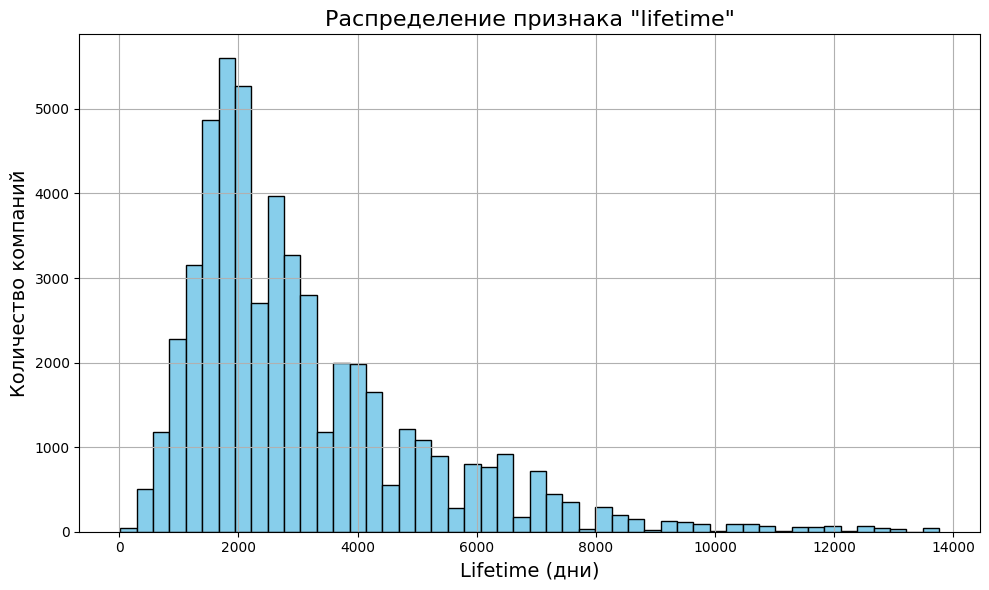

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df_train['lifetime'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение признака "lifetime"', fontsize=16)
plt.xlabel('Lifetime (дни)', fontsize=14)
plt.ylabel('Количество компаний', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


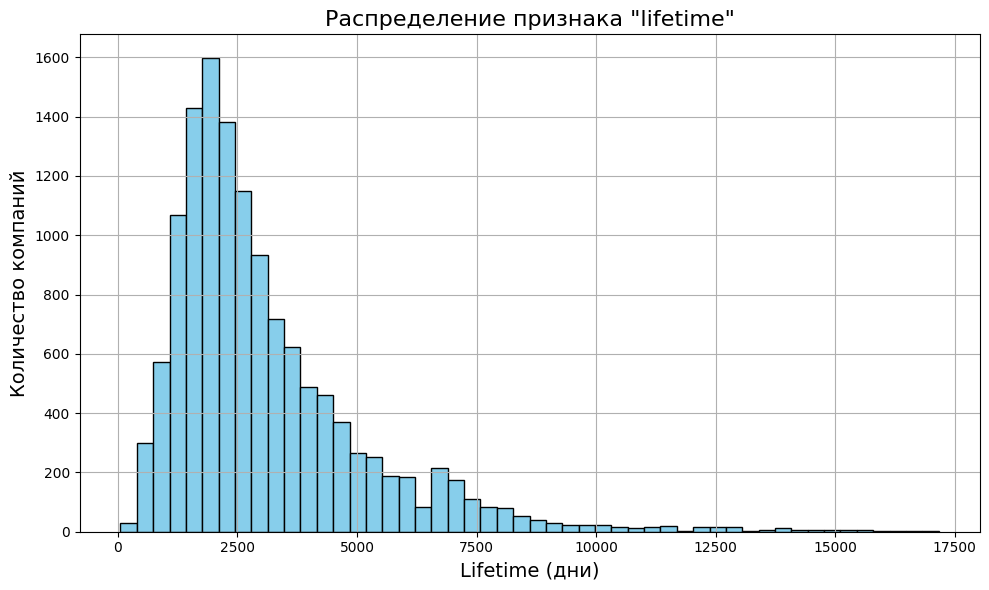

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(df_test['lifetime'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение признака "lifetime"', fontsize=16)
plt.xlabel('Lifetime (дни)', fontsize=14)
plt.ylabel('Количество компаний', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
def categorize_lifetime(df, column='lifetime'):
    """
    Заменяет числовые значения 'lifetime' на категориальные интервалы.
    
    Интервалы:
    - до 3 лет (<= 1095 дней)
    - до 5 лет (<= 1825)
    - до 8 лет (<= 2920)
    - до 14 лет (<= 5110)
    - до 20 лет (<= 7300)
    - более 20 лет (> 7300)
    """
    bins = [0, 1095, 1825, 2920, 5110, 7300, float('inf')]
    labels = ['до 3 лет', 'до 5 лет', 'до 8 лет', 'до 14 лет', 'до 20 лет', 'более 20 лет']
    
    df[column + '_category'] = pd.cut(df[column], bins=bins, labels=labels, right=True)
    return df

In [36]:
df_train = categorize_lifetime(df_train, column='lifetime')
df_test = categorize_lifetime(df_test, column='lifetime')

In [37]:
df_train['lifetime_category'].value_counts()

lifetime_category
до 8 лет        16335
до 14 лет       13708
до 5 лет        10854
до 20 лет        5517
до 3 лет         3479
более 20 лет     2417
Name: count, dtype: int64

In [38]:
df_test['lifetime_category'].value_counts()

lifetime_category
до 8 лет        4142
до 14 лет       3441
до 5 лет        2709
до 20 лет       1281
до 3 лет         924
более 20 лет     628
Name: count, dtype: int64

In [39]:
df_train.loc[df_train['funding_total_usd']==-1,'funding_total_usd']=1

In [40]:
def categorize_funding(funding):
    if funding == 1:
        return "Финансирование неизвестно"
    elif funding <= 10_000:
        return "До 10 тыс. USD"
    elif funding <= 100_000:
        return "До 100 тыс. USD"
    elif funding <= 1_000_000:
        return "До 1 млн USD"
    elif funding <= 10_000_000:
        return "До 10 млн USD"
    elif funding <= 100_000_000:
        return "До 100 млн USD"
    else:
        return "Свыше 100 млн USD"
df_test['funding_category'] = df_test['funding_total_usd'].apply(categorize_funding)
df_train['funding_category'] = df_train['funding_total_usd'].apply(categorize_funding)

In [41]:
df_test['funding_category'].value_counts()

funding_category
До 10 млн USD                3686
Свыше 100 млн USD            2865
До 1 млн USD                 2766
До 100 млн USD               2308
До 100 тыс. USD              1344
До 10 тыс. USD                155
Финансирование неизвестно       1
Name: count, dtype: int64

In [42]:
df_train['funding_category'].value_counts()

funding_category
До 10 млн USD                14895
Свыше 100 млн USD            11239
До 1 млн USD                 10973
До 100 млн USD                9204
До 100 тыс. USD               5383
До 10 тыс. USD                 615
Финансирование неизвестно        1
Name: count, dtype: int64

In [43]:
# Приведение нужных колонок к datetime
date_columns = [   'first_funding_at', 'last_funding_at' ]
for col in date_columns:
    df_test[col] = pd.to_datetime(df_test[col], errors='coerce')

# Для df_test
 
df_test['first_to_last_funding'] = (df_test['last_funding_at'] - df_test['first_funding_at']).dt.days
 

In [44]:
#Исследования зависимости status от сгенерированных признаков даты.

def add_dates_information(data,date_columns = date_columns[:-1], return_list = False):
 
    if return_list:
        new_columns_list = []
        names = ['month','day_of_week','week_of_year',
                 'day_of_year','day_of_month','year']

    for feature in date_columns:
        data[f'{feature}_month'] = data[feature].dt.month
        data[f'{feature}_day_of_week'] = data[feature].dt.dayofweek
        data[f'{feature}_week_of_year'] = data[feature].dt.isocalendar().week
        data[f'{feature}_day_of_year'] = data[feature].dt.dayofyear
        data[f'{feature}_day_of_month'] = data[feature].dt.day
        data[f'{feature}_year'] = data[feature].dt.year
        if return_list:
            new_columns_list += [f'{feature}_{name}' for name in names]

    if return_list == False:
        return data
    else:
        return data, new_columns_list

In [45]:

dates_data = df_train.copy()
dates_data, new_dates_columns = add_dates_information(dates_data,return_list=True)
dates_data['is_closed'] = (dates_data['status'] == 'closed') * 1
dates_data.sample(3)

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,last_date,lifetime,founded_to_first_funding,first_to_last_funding,first_to_closed,last_to_closed,lifetime_category,funding_category,first_funding_at_month,first_funding_at_day_of_week,first_funding_at_week_of_year,first_funding_at_day_of_year,first_funding_at_day_of_month,first_funding_at_year,is_closed
7640,StyleJam,Design|Web Design,NaN,closed,unknown,unknown,unknown,unknown,1,2010-12-31,2011-03-01,2011-03-01,2012-07-05,552,60,0,492,492,до 3 лет,Свыше 100 млн USD,3,1,9,60,1,2011,1
51482,NXTV,unknown,NaN,operating,USA,CA,Los Angeles,Los Angeles,1,2002-07-15,2003-06-24,2003-06-24,2018-01-01,5649,344,0,5305,5305,до 20 лет,Свыше 100 млн USD,6,1,26,175,24,2003,0
29656,Zero One Network International Limited,Alumni,41250.0,operating,HKG,unknown,Hong Kong,Hong Kong,1,2013-11-17,2015-08-01,2015-08-01,2018-01-01,1506,622,0,884,884,до 5 лет,До 100 тыс. USD,8,5,31,213,1,2015,0


In [46]:
n = 0
for col in new_dates_columns[6*n:6*n+6]:
    display(dates_data[dates_data['founded_at']>'1971'].groupby(col)['is_closed'].agg(['mean','count']))

,mean,count
first_funding_at_month,,
1,0.107703,6945
2,0.094625,3572
3,0.098440,4358
4,0.090081,3952
5,0.098423,3932
6,0.100220,4550
7,0.091981,4240
8,0.087058,4296
9,0.079419,4407


,mean,count
first_funding_at_day_of_week,,
0,0.094497,9376
1,0.092009,9999
2,0.088456,9338
3,0.085593,8739
4,0.098448,7669
5,0.107460,3378
6,0.105747,3811


,mean,count
first_funding_at_week_of_year,,
1,0.118295,2722
2,0.088841,923
3,0.071072,802
4,0.093878,735
5,0.102495,1483
6,0.098338,722
7,0.076305,747
8,0.083333,648
9,0.114140,1761


,mean,count
first_funding_at_day_of_year,,
1,0.130993,3504
2,0.047059,85
3,0.139785,93
4,0.077922,77
5,0.057971,138
...,...,...
362,0.033898,59
363,0.068493,73
364,0.031579,95


,mean,count
first_funding_at_day_of_month,,
1,0.118690,14441
2,0.090220,1319
3,0.102729,1246
4,0.090601,1181
5,0.077872,1297
6,0.077045,1259
7,0.084531,1183
8,0.068761,1178
9,0.078624,1221


,mean,count
first_funding_at_year,,
1982,1.000000,2
1983,1.000000,1
1984,0.333333,3
1985,0.666667,3
1986,0.000000,3
1987,1.000000,2
1988,0.666667,3
1989,0.000000,5
1990,0.333333,9


## Пропуски
 

Пропуски будем обрабатывать в pipline, заменяя их на фиксированные значения.

## Матрица корреляций

In [47]:
df_train.funding_total_usd.fillna(-1, inplace=True)
df_train.name.fillna('unknown', inplace=True)

phik_overview = df_train.sample(1000).phik_matrix()

interval columns not set, guessing: ['funding_total_usd', 'funding_rounds', 'lifetime', 'founded_to_first_funding', 'first_to_last_funding', 'first_to_closed', 'last_to_closed']


**Матрица всех признаков**

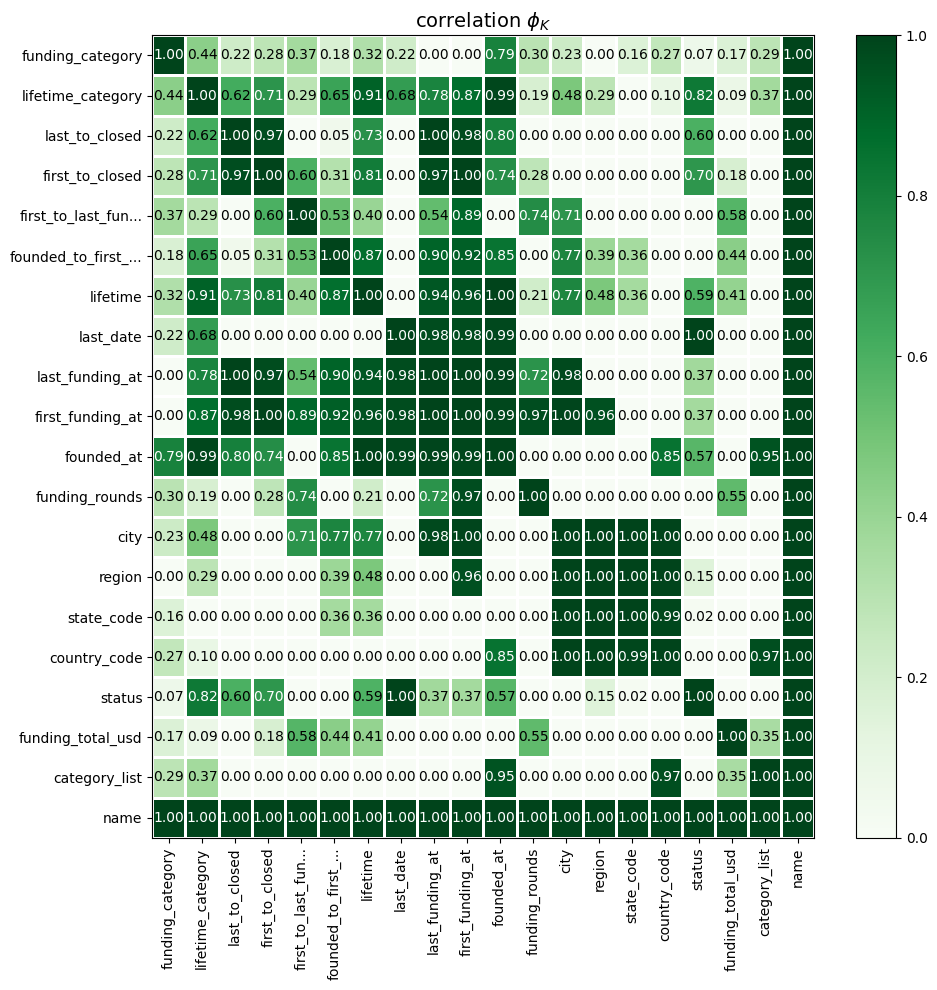

In [48]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Greens', title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(10,10))
plt.tight_layout()

**Только с целевым признаком**

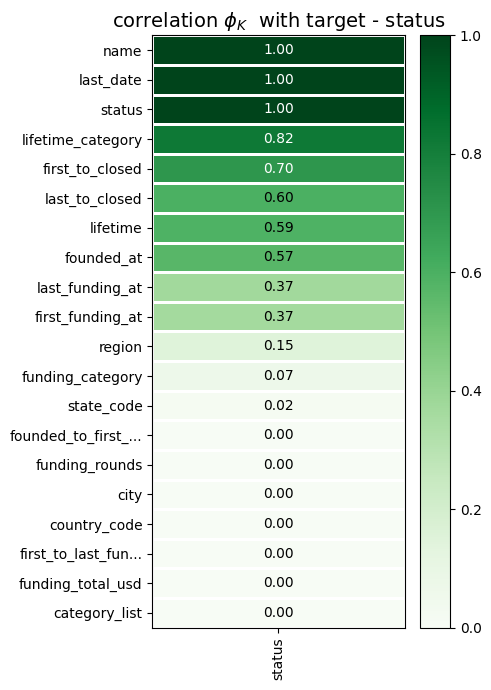

In [49]:
phik_only_status = phik_overview[['status']].sort_values(ascending=True,by='status')
plot_correlation_matrix(phik_only_status.values, x_labels=phik_only_status.columns, y_labels=phik_only_status.index, 
                        vmin=0, vmax=1, color_map='Greens', title=r'correlation $\phi_K$  with target - status', 
                        fontsize_factor=1, figsize=(5,7))
plt.tight_layout()

**Новые признаки даты**

In [50]:
dates_data.funding_total_usd.fillna(-1, inplace=True)
dates_data.name.fillna('unknown', inplace=True)

phik_new_dates = dates_data.iloc[:,2:].sample(1000).phik_matrix()

interval columns not set, guessing: ['funding_total_usd', 'funding_rounds', 'lifetime', 'founded_to_first_funding', 'first_to_last_funding', 'first_to_closed', 'last_to_closed', 'first_funding_at_month', 'first_funding_at_day_of_week', 'first_funding_at_week_of_year', 'first_funding_at_day_of_year', 'first_funding_at_day_of_month', 'first_funding_at_year', 'is_closed']


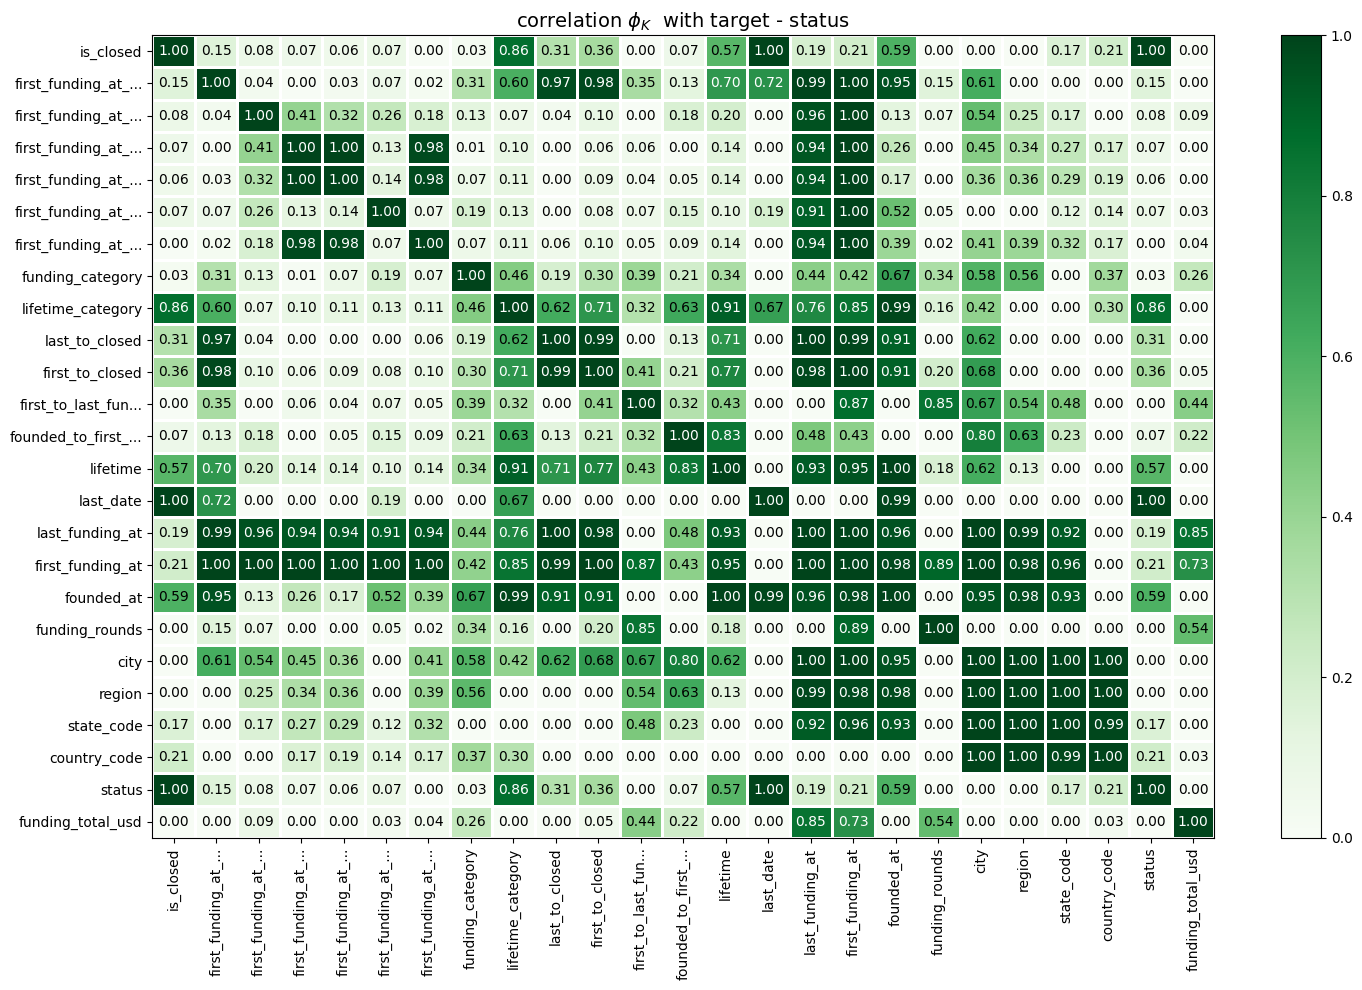

In [51]:
plot_correlation_matrix(phik_new_dates.values, x_labels=phik_new_dates.columns, y_labels=phik_new_dates.index, 
                        vmin=0, vmax=1, color_map='Greens', title=r'correlation $\phi_K$  with target - status', 
                        fontsize_factor=1, figsize=(15,10))

plt.tight_layout()

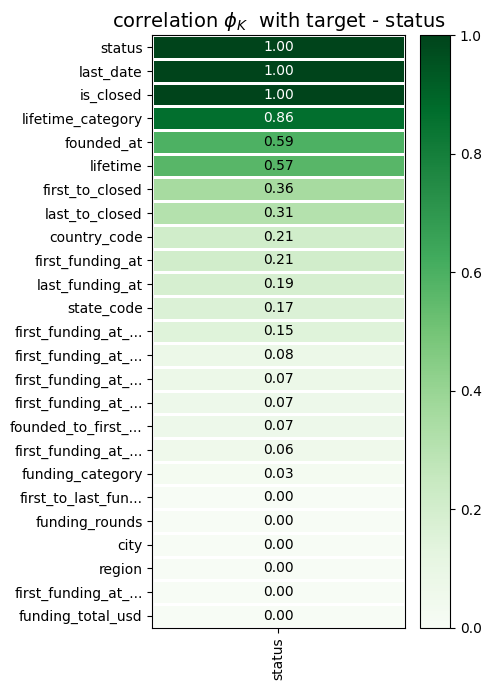

In [52]:
phik_new_dates_status = phik_new_dates[['status']].sort_values(ascending=True,by='status')
plot_correlation_matrix(phik_new_dates_status.values, x_labels=phik_new_dates_status.columns, y_labels=phik_new_dates_status.index, 
                        vmin=0, vmax=1, color_map='Greens', title=r'correlation $\phi_K$  with target - status', 
                        fontsize_factor=1, figsize=(5,7))
plt.tight_layout()

### Признаки даты и географии: анализ и выводы

- **Географические признаки**: `country_code`, `state_code`, `region`, `city`  
  Эти признаки демонстрируют высокую корреляцию между собой, поскольку часто дублируют информацию в разных масштабах (например, `state_code` и `region` часто содержат схожую информацию внутри одной страны).

- **Вывод**:  
  Возможно, стоит **удалить менее информативные или избыточные географические признаки**, чтобы уменьшить шум и переобучение модели.

---

### Корреляция с целевой переменной

- Среди всех признаков **наибольшую корреляцию с таргетом** показывают:

  - `first_to_closed` — разница в днях между первой датой финансирования и последней датой наблюдения (`last_date`)
  - `last_to_closed` — разница между последним раундом и последней датой наблюдения

- **Интерпретация**:  
  Эти признаки отражают "жизненный цикл" финансирования стартапа и могут косвенно указывать на его устойчивость и интерес инвесторов, что делает их сильными предикторами статуса (`status`).

---

### Рекомендации

- Оставить признаки, отражающие **временные интервалы** между финансированием и `last_date`.
- Провести **оценку важности географических признаков** с помощью feature importance (например, через `RandomForest`, `XGBoost`, `SHAP`) и удалить наименее значимые.


**Закодированный category_list**

In [53]:
# Создание объекта TargetEncoder
encoder = ce.TargetEncoder(cols=['category_list'])

categories = df_train[['category_list']+['status']]
categories['category_list_encoded'] = encoder.fit_transform(X=categories['category_list'],
                                                            y=(categories['status'] == 'closed')*1)

In [54]:
categories

,category_list,status,category_list_encoded
0,Online Reservations|Restaurants,operating,0.081501
1,Manufacturing|Medical|Medical Devices,operating,0.095388
2,Biotechnology,operating,0.063947
3,Health Care,operating,0.081411
4,Manufacturing,operating,0.045378
...,...,...,...
52511,Entertainment,operating,0.032007
52512,Hospitality,operating,0.039568
52513,Email|Messaging|Productivity Software,operating,0.080401
52514,Security,operating,0.072785


In [55]:
phik_overview = (categories[['category_list_encoded','status']].sample(1000)
                 .phik_matrix().sort_values(ascending=True,by='status'))

interval columns not set, guessing: ['category_list_encoded']


In [56]:
phik_overview


,category_list_encoded,status
category_list_encoded,1.000000,0.646001
status,0.646001,1.000000


**Корреляция гео признаков и таргета**

In [57]:
phik_overview = (df_train[categorical_columns+['status']].sample(1000)
                 .phik_matrix().sort_values(ascending=True,by='status'))

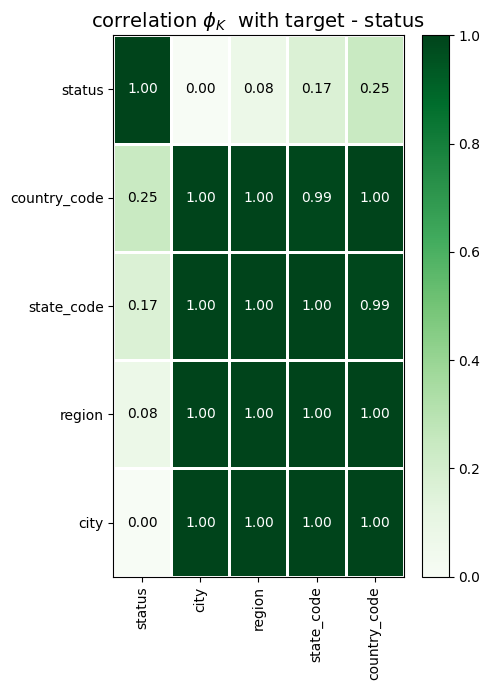

In [58]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Greens', title=r'correlation $\phi_K$  with target - status', 
                        fontsize_factor=1, figsize=(5,7))
plt.tight_layout()

**Отбор финального набора обучающих признаков**

In [ ]:
X = dates_data.drop(['lifetime',
                'category_list',
                  'funding_total_usd',
                  'country_code', 
                  'state_code',
                  'region',
                  'founded_at',
                  'first_funding_at',
                  'last_funding_at',
                  'last_date', 
                  'founded_to_first_funding',
                  'first_to_closed',
                  'last_to_closed', 
                  'first_to_last_funding',
                   'status',
                   'is_closed',
                   'name'], axis=1).copy()
y = dates_data['status'].copy() 

# Определение доступных признаков после удаления высоко коррелированных
numeric_features = [
    'funding_rounds', 
    'first_funding_at_month',
    'first_funding_at_day_of_week',
    'first_funding_at_week_of_year',
    'first_funding_at_day_of_year',
    'first_funding_at_day_of_month',
    'first_funding_at_year',
 
]
categorical_features = [  'city','lifetime_category','funding_category']   
 

# Проверка наличия признаков в DataFrame
numeric_features_present = [feature for feature in numeric_features if feature in X.columns]
categorical_features_present = [feature for feature in categorical_features if feature in X.columns]

# Разделение на числовые и категориальные признаки
X_num = X[numeric_features_present]
X_cat = X[categorical_features_present]

# Ограничение количества уникальных категорий для ускорения One-Hot Encoding
top_n = 10  # Количество топ категорий для каждого признака
for col in categorical_features_present:
    top_categories = X_cat[col].value_counts().nlargest(top_n).index
    X_cat[col] = X_cat[col].apply(lambda x: x if x in top_categories else 'Other')
    
# Кодирование категориальных признаков с помощью One-Hot Encoding
X_cat_encoded = pd.get_dummies(X_cat, drop_first=True, dummy_na=False)

# Объединение числовых и закодированных категориальных признаков
X_processed = pd.concat([X_num, X_cat_encoded], axis=1)

# Отбор признаков с помощью SelectKBest
selector = SelectKBest(score_func=mutual_info_classif, k=500)
X_selected = selector.fit_transform(X_processed, y)

# Получение названий выбранных признаков
selected_indices = selector.get_support(indices=True)
selected_feature_names = X_processed.columns[selected_indices]

print("Отобранные признаки:")
print(selected_feature_names.tolist())

# Обновление обучающего набора данных с отобранными признаками
train_df_final = pd.DataFrame(X_selected, columns=selected_feature_names)
train_df_final['status'] = y.values

In [ ]:

print(f"Размер финального обучающего набора данных: {train_df_final.shape}")

## Обучение модели

In [72]:
# Определение признаков и целевой переменной
X = train_df_final.drop('status', axis=1)
y = train_df_final['status']

# Стратегия кросс-валидации
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Определение моделей и их гиперпараметров  
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42,class_weight='balanced'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5]
        }
    },
 
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42,class_weight='balanced'),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2']
        }
    },
 
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
        'params': {
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
 
    },
        'PassiveAggressive': {
        'model': PassiveAggressiveClassifier(random_state=42, class_weight='balanced'),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'max_iter': [1000, 2000],
            'loss': ['hinge', 'squared_hinge']
        }
    },

    'Ridge': {
        'model': RidgeClassifier(class_weight='balanced'),
        'params': {
            'alpha': [0.1, 1.0, 10.0],
            'solver': ['auto', 'sag', 'saga']
        }
    },
  

}

                        
                              
# Словарь для хранения лучших моделей и их оценок
best_models = {}
best_scores = {}

# Обучение и подбор гиперпараметров для каждой модели
for name, config in models.items():
    print(f"Обучение модели: {name}")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=cv,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X, y)
    best_models[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_
    print(f"Лучшая оценка AUC: {grid_search.best_score_:.4f}")
    print(f"Лучшие параметры: {grid_search.best_params_}\n")

# Вывод лучших моделей и их AUC
print("Лучшие модели и их оценки AUC:")
for name, score in best_scores.items():
    print(f"{name}: AUC = {score:.4f}")

Обучение модели: RandomForest
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Лучшая оценка AUC: 0.9495
Лучшие параметры: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Обучение модели: LogisticRegression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Лучшая оценка AUC: 0.8935
Лучшие параметры: {'C': 1, 'penalty': 'l2'}

Обучение модели: DecisionTree
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Лучшая оценка AUC: 0.9284
Лучшие параметры: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

Обучение модели: PassiveAggressive
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Лучшая оценка AUC: 0.5658
Лучшие параметры: {'C': 0.01, 'loss': 'squared_hinge', 'max_iter': 1000}

Обучение модели: Ridge
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Лучшая оценка AUC: 0.9226
Лучшие параметры: {'alpha': 10.0, 'solver': 'sag'}

Лучшие модели и их оценки AUC:
RandomForest: AUC = 

## Итоговая оценка качества предсказания лучшей модели

In [68]:
dates_data_test = df_test.copy()
dates_data_test, new_dates_columns = add_dates_information(dates_data_test,return_list=True)
dates_data_test.sample(3)

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime,lifetime_category,funding_category,first_to_last_funding,first_funding_at_month,first_funding_at_day_of_week,first_funding_at_week_of_year,first_funding_at_day_of_year,first_funding_at_day_of_month,first_funding_at_year
1339,Affordit.com,E-Commerce,600000.0,USA,OH,"Columbus, Ohio",Powell,1,2009-12-16,2009-12-16,3623,до 14 лет,До 1 млн USD,0,12,2,51,350,16,2009
9499,SceneChat,Advertising,250000.0,USA,CA,SF Bay Area,San Francisco,1,2011-08-05,2011-08-05,1036,до 3 лет,До 1 млн USD,0,8,4,31,217,5,2011
4806,Everfi,EdTech|Education|Internet,21000000.0,USA,DC,"Washington, D.C.",Washington,2,2010-09-02,2012-08-14,3653,до 14 лет,До 100 млн USD,712,9,3,35,245,2,2010


In [73]:
X = dates_data.drop(['lifetime',
                'category_list',
                  'funding_total_usd',
                  'country_code', 
                  'state_code',
                  'region',
                  'founded_at',
                  'first_funding_at',
                  'last_funding_at',
                  'last_date', #
                  'founded_to_first_funding',
                  'first_to_closed',
                  'last_to_closed', #
                  'first_to_last_funding',
                   'status',
                   'is_closed',
                   'name'], axis=1).copy()
y = dates_data['status'].copy()

 
# Определение доступных признаков после удаления высоко коррелированных
numeric_features = [ 
    'funding_rounds',
    'first_funding_at_month',
    'first_funding_at_day_of_week',
    'first_funding_at_week_of_year',
    'first_funding_at_day_of_year',
    'first_funding_at_day_of_month',
    'first_funding_at_year',
 
]
categorical_features = [  'city','lifetime_category','funding_category']   

# Проверяем наличие признаков
# Проверяем наличие признаков
numeric_features_present = [feature for feature in numeric_features if feature in X.columns]
categorical_features_present = [feature for feature in categorical_features if feature in X.columns]

# Разделяем числовые и категориальные признаки
X_num = X[numeric_features_present]
X_cat = X[categorical_features_present].copy()

# Ограничиваем количество уникальных категорий для One-Hot Encoding
top_n = 10  # Количество топ категорий для сохранения
for col in categorical_features_present:
    top_categories = X_cat[col].value_counts().nlargest(top_n).index
    X_cat.loc[:, col] = X_cat[col].apply(lambda x: x if x in top_categories else 'Other')

# One-Hot Encoding для категориальных признаков
X_cat_encoded = pd.get_dummies(X_cat, drop_first=True, dummy_na=False)

# Объединяем числовые и закодированные категориальные признаки
X_processed = pd.concat([X_num, X_cat_encoded], axis=1)

# Сохраняем список всех названий признаков после кодирования
all_feature_names = X_processed.columns.tolist()

# Отбор признаков с помощью SelectKBest
selector = SelectKBest(score_func=mutual_info_classif, k=500)
X_selected = selector.fit_transform(X_processed, y)

# Получаем названия выбранных признаков
selected_indices = selector.get_support(indices=True)
selected_feature_names = [all_feature_names[i] for i in selected_indices]

print("Отобранные признаки:")
print(selected_feature_names)

# 2. Используем обученную модель из Шага 7
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]
print(f"Лучшая модель: {best_model_name} с AUC = {best_scores[best_model_name]:.4f}")

# Дополнительная оценка на обучающих данных (опционально)
cv_scores = cross_val_score(best_model, X_selected, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f"Кросс-валидация ROC AUC для {best_model_name}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

y_pred_proba = best_model.predict_proba(X_selected)[:, 1]
y_pred = best_model.predict(X_selected)

roc_auc = roc_auc_score(y, y_pred_proba)
print(f"ROC AUC на обучающем наборе: {roc_auc:.4f}")

print("Отчёт классификации на обучающем наборе:")
print(classification_report(y, y_pred))

print("Матрица ошибок на обучающем наборе:")
print(confusion_matrix(y, y_pred))

# 3. Обработка тестового набора данных

# Копируем test_df для обработки
# Копируем test_df для обработки
test_df_processed = dates_data_test.copy()

# Убеждаемся, что та же обработка применяется к тестовым данным
# Обрабатываем пропущенные значения в числовых признаках, если необходимо
# Для простоты предполагаем, что пропущенные значения были обработаны в предыдущих шагах

# Заменяем редкие категории на 'Other' в тестовых данных
for col in categorical_features_present:
    top_categories = X_cat[col].value_counts().nlargest(top_n).index
    test_df_processed.loc[:, col] = test_df_processed[col].apply(lambda x: x if x in top_categories else 'Other')

# One-Hot Encoding для тестовых данных
test_X_cat_encoded = pd.get_dummies(test_df_processed[categorical_features_present], drop_first=True, dummy_na=False)

# Обработка числовых признаков в тестовых данных
test_X_num = test_df_processed[numeric_features_present]

# Объединяем числовые и закодированные категориальные признаки в тестовых данных
test_X_processed = pd.concat([test_X_num, test_X_cat_encoded], axis=1)

# Убеждаемся, что тестовые данные имеют те же признаки, что и обучающие
# Добавляем недостающие столбцы в тестовые данные и заполняем их нулями
missing_cols = set(all_feature_names) - set(test_X_processed.columns)
for col in missing_cols:
    test_X_processed[col] = 0

# Удаляем лишние столбцы в тестовых данных
extra_cols = set(test_X_processed.columns) - set(all_feature_names)
if extra_cols:
    test_X_processed = test_X_processed.drop(columns=extra_cols)
    print(f"Удалены лишние признаки из тестовых данных: {extra_cols}")

# Переупорядочиваем столбцы в тестовых данных, чтобы они соответствовали обучающим
test_X_processed = test_X_processed[all_feature_names]

# Применяем SelectKBest к тестовым данным
X_test_selected = selector.transform(test_X_processed)

# 4. Предсказание классов на тестовом наборе данных
test_pred = best_model.predict(X_test_selected)

# 5. Подготовка файла для отправки

# Отображаем предсказанные классы в 'operating' и 'closed'
submission_df = pd.DataFrame({
    'name': test_df_processed['name'],
    'status': test_pred
})

# Проверяем формат отправки
print("Пример файла для отправки:")
print(submission_df.head())

Отобранные признаки:
['funding_rounds', 'first_funding_at_month', 'first_funding_at_day_of_week', 'first_funding_at_week_of_year', 'first_funding_at_day_of_year', 'first_funding_at_day_of_month', 'first_funding_at_year', 'city_Cambridge', 'city_Chicago', 'city_London', 'city_Los Angeles', 'city_New York', 'city_Other', 'city_Palo Alto', 'city_San Francisco', 'city_Seattle', 'city_unknown', 'lifetime_category_до 5 лет', 'lifetime_category_до 8 лет', 'lifetime_category_до 14 лет', 'lifetime_category_до 20 лет', 'lifetime_category_более 20 лет', 'funding_category_До 10 млн USD', 'funding_category_До 10 тыс. USD', 'funding_category_До 100 млн USD', 'funding_category_До 100 тыс. USD', 'funding_category_Свыше 100 млн USD', 'funding_category_Финансирование неизвестно']
Лучшая модель: RandomForest с AUC = 0.9495
Кросс-валидация ROC AUC для RandomForest: 0.9495 ± 0.0077
ROC AUC на обучающем наборе: 0.9979
Отчёт классификации на обучающем наборе:
              precision    recall  f1-score   sup

In [74]:
submission_df['status'].value_counts()

status
operating    11885
closed        1240
Name: count, dtype: int64

In [78]:
# Сохраняем файл для отправки
submission_file_path = "startap.csv"
submission_df.to_csv(submission_file_path, index=False)
print(f"Файл для отправки сохранён по пути: {submission_file_path}")

 

Файл для отправки сохранён по пути: startap.csv


In [77]:


# Указываем путь для сохранения
model_pkl_path = f"best_model_{best_model_name}.pkl"

# Сохраняем модель
with open(model_pkl_path, 'wb') as f:
    pickle.dump(best_model, f)

print(f"Модель {best_model_name} сохранена в формате .pkl по пути: {model_pkl_path}")


Модель RandomForest сохранена в формате .pkl по пути: best_model_RandomForest.pkl


# Итоговый вывод проекта

В ходе проекта был проведен анализ данных стартапов с целью предсказания их статуса (работающий или закрытый). Наилучшие результаты были достигнуты с использованием модели Random Forest, которая продемонстрировала высокую эффективность в предсказании статуса стартапов.

## Основные результаты:

- **Лучшая модель**: Random Forest с ROC AUC = 0.9495.
- **Кросс-валидация**: ROC AUC для Random Forest составил 0.9495 ± 0.0077, что подтверждает стабильность модели.
- **ROC AUC на обучающем наборе**: 0.9979, что указывает на отличное качество подгонки модели к данным.

## Отчет классификации на обучающем наборе:

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
| **closed**   | 0.88      | 0.96   | 0.92     | 4901    |
| **operating**| 1.00      | 0.99   | 0.99     | 47409   |
| **accuracy** |           |        | 0.98     | 52310   |
| **macro avg**| 0.94      | 0.97   | 0.95     | 52310   |
| **weighted avg**| 0.98   | 0.98   | 0.98     | 52310   |

## Матрица ошибок на обучающем наборе:

\[
\begin{array}{cc}
\text{Predicted Closed} & \text{Predicted Operating} \\
\hline
4714 & 187 \\
659 & 46750 \\
\end{array}
\]

Матрица ошибок показывает, что модель хорошо справляется с классификацией, хотя и допускает некоторые ошибки при определении стартапов, которые закрываются.

## Пример файла для отправки:

| name                    | status     |
|-------------------------|------------|
| Crystalsol              | operating  |
| JBI Fish & Wings        | operating  |
| COINPLUS                | operating  |
| Imagine Communications   | operating  |
| DNA13                   | operating  |

## Заключение

Проект успешно достиг своей цели, предоставив надежные предсказания статуса стартапов. Модель Random Forest показала высокую точность и стабильность, что делает её полезным инструментом для инвесторов, стремящихся оценить жизнеспособность стартапов и принимать обоснованные инвестиционные решения. Результаты анализа могут быть использованы для выявления потенциальных рисков и возможностей, что в свою очередь способствует более эффективному распределению ресурсов.
